In [1]:
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [2]:
from tensorflow.keras import datasets
(X_tn0,y_tn0), (X_te0,y_te0) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [4]:
print(X_tn0.shape)

(60000, 28, 28)


In [5]:
print(y_tn0.shape)

(60000,)


In [6]:
print(X_te0.shape)

(10000, 28, 28)


In [7]:
print(y_te0.shape)

(10000,)


<function matplotlib.pyplot.show(close=None, block=None)>

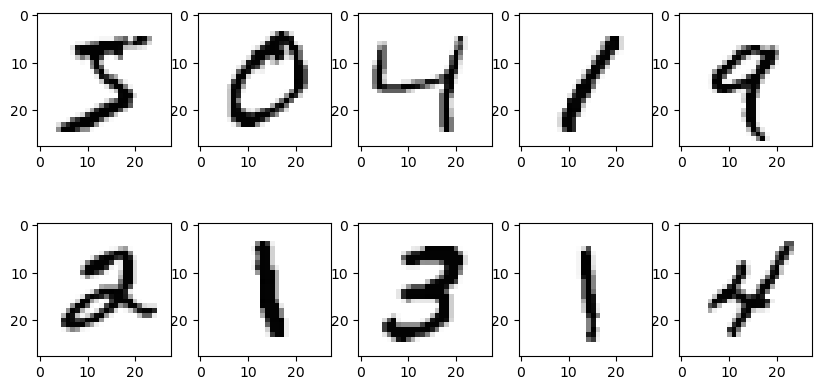

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i in range(2*5):
    plt.subplot(2,5,i+1)
    plt.imshow(X_tn0[i].reshape((28,28)),
              cmap='Greys')
plt.show

In [9]:
X_tn_re = X_tn0.reshape(60000,28,28,1)
X_tn = X_tn_re/255
print(X_tn.shape)

(60000, 28, 28, 1)


In [10]:
X_te_re = X_te0.reshape(10000,28,28,1)

In [11]:
X_te = X_te_re/255
print(X_te.shape)

(10000, 28, 28, 1)


In [12]:
import numpy as np
X_tn_noise = X_tn + np.random.uniform(-1,1,size=X_tn.shape)
X_te_noise = X_te + np.random.uniform(-1,1,size=X_te.shape)

In [13]:
X_tn_ns = np.clip(X_tn_noise,a_min=0,a_max=1)
X_te_ns = np.clip(X_te_noise,a_min=0,a_max=1)

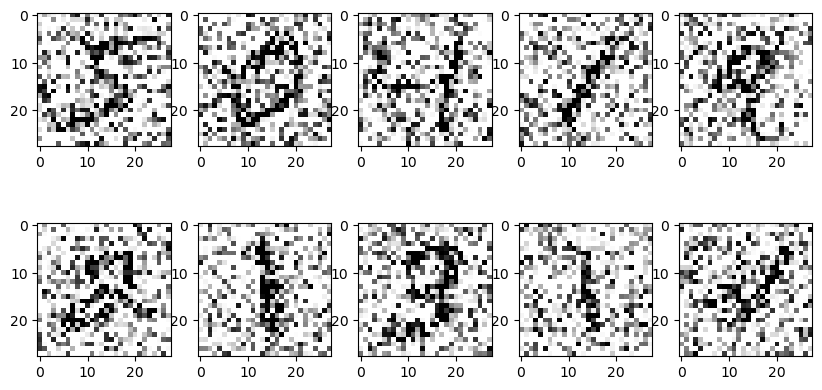

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i in range(2*5):
    plt.subplot(2,5,i+1)
    plt.imshow(X_tn_ns[i].reshape((28,28)),cmap='Greys')
plt.show()

In [17]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import Activation

In [20]:
input_layer1 = Input(shape=(28,28,1))
x1 = Conv2D(20,kernel_size=(5,5),padding='same')(input_layer1)
x1 = Activation(activation='relu')(x1)
output_layer1 = MaxPool2D(pool_size=2,padding='same')(x1)
encoder = Model(input_layer1,output_layer1)
encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 20)        520       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
Total params: 520
Trainable params: 520
Non-trainable params: 0
_________________________________________________________________


In [21]:
print(output_layer1.shape)

(None, 14, 14, 20)


In [22]:
print(output_layer1.shape[0])

None


In [23]:
print(output_layer1.shape[1])

14


In [24]:
print(output_layer1.shape[2])

14


In [25]:
print(output_layer1.shape[3])

20


In [30]:
#Make an decoder model
input_layer2 = Input(shape=output_layer1.shape[1:4])
x2 = Conv2D(10,kernel_size=(5,5),padding='same')(input_layer2)
x2 = Activation(activation='relu')(x2)
x2 = UpSampling2D()(x2)
x2 = Conv2D(1,kernel_size=(5,5),padding='same')(x2)
output_layer2 = Activation(activation='relu')(x2)
decoder = Model(input_layer2,output_layer2)
decoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 14, 14, 20)]      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 10)        5010      
_________________________________________________________________
activation_7 (Activation)    (None, 14, 14, 10)        0         
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 28, 28, 10)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 1)         251       
_________________________________________________________________
activation_8 (Activation)    (None, 28, 28, 1)         0         
Total params: 5,261
Trainable params: 5,261
Non-trainable params: 0
_________________________________________________________

In [33]:
input_auto = Input(shape=(28,28,1))
output_auto = decoder(encoder(input_auto))
auto_encoder = Model(input_auto,output_auto)
auto_encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
model (Functional)           (None, 14, 14, 20)        520       
_________________________________________________________________
model_1 (Functional)         (None, 28, 28, 1)         5261      
Total params: 5,781
Trainable params: 5,781
Non-trainable params: 0
_________________________________________________________________


In [34]:
auto_encoder.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])

In [37]:
hist = auto_encoder.fit(X_tn_ns,X_tn,epochs=1,batch_size=100)

600/600 [==============================] - 106s 174ms/step - loss: 0.0335 - mean_squared_error: 0.0335


In [38]:
X_pred = auto_encoder.predict(X_tn_ns)

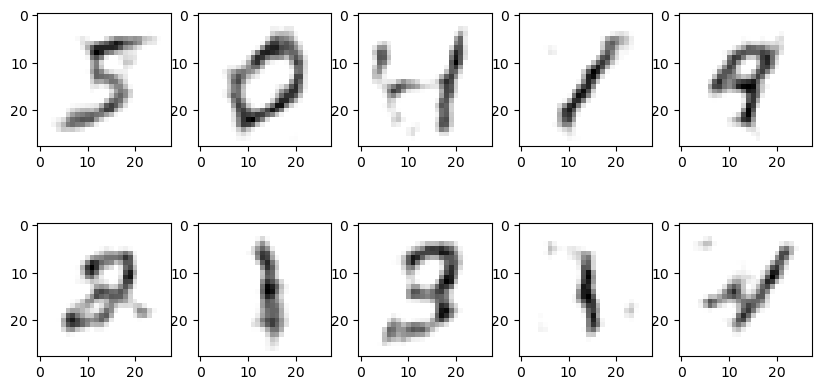

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i in range(2*5):
    plt.subplot(2,5,i+1)
    plt.imshow(X_pred[i].reshape((28,28)),cmap='Greys')
plt.show()

In [1]:
from tensorflow import keras

encoder = keras.models.Sequential([keras.layers.Dense(2,input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3,input_shape=[2])])
autoencoder = keras.models.Sequential([encoder,decoder])

autoencoder.compile(loss='mse',optimizer=keras.optimizers.SGD(lr=0.1))

In [ ]:
history = autoencoder.fit(x_train,x_train,epochs = 20)
codings= encoder.predict(x_train)

In [ ]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Faltten(input_shape=[28,28]),
    keras.layers.Dense(100,activation='selu'),
    keras.layers.Dense(30,activation='selu'),
])

stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100,activation='selu',input_shape=[30]),
    keras.layers.Dense(28*28, activation='sigmoid'),
    keras.layers.Reshape([28,28])
])

stacked_ae = keras.models.Sequential([stakced_encoder,stacked_decoder])
stacked_ae.compile(loss='binary_crossentropy',optimizer=keras.optimizers.SGD(lr=1.5))
history = stacked_ae.fit(x_train,x_train,epochs-10,validation_data=(x_valid,x_valid))

In [ ]:
def plot_image(image):
    plt.imshow(image,cmap='binary')
    plt.axis('off')
    
def show_reconstructions(model,n_images=5):
    reconstructions= model.predict(x_valid[:n_images])
    fig = plt.figure(figsize=(n_images*1.5,3))
    for idx in range(n_images):
        plt.subplot(2,n_images,1+idx)
        plot_image(x_valid[idx])
        plt.subplot(2,n_images,1+n_images+idx)
        plt_image(reconstructions[idx])
        
show_reconstructions(stacked_ae)

In [ ]:
from sklearn.manifold import TSNE

x_valid_compressed = stacked_encoder.predict(x_valid)
tsne = TSNE()

x_valid_2D = tne.fit_transform(x_valid_compressed)

plt.scatter(x_valid_2D[:,0],x_valid_2D[:,1],c=y_valid,s=10,cmap='tab10')